### 1. Import Libraries

In [271]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

### 2. Load Dataset

In [272]:

data = load_breast_cancer()
df = pd.DataFrame(data.data , columns = data.feature_names)
df['target'] = data.target




### 3. Explore Data

In [273]:

print(df.head(10))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [274]:

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [275]:

print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [276]:

print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


### 4. Preprocess Data

In [277]:

X = df.drop('target', axis= 1)
y = df['target']

In [278]:
# Scale features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 5. Split Data


In [279]:


X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)


### 6. Apply PCA

In [280]:

# First: Analyze variance explained by components

pca = PCA()

X_pca = pca.fit_transform(X_train)


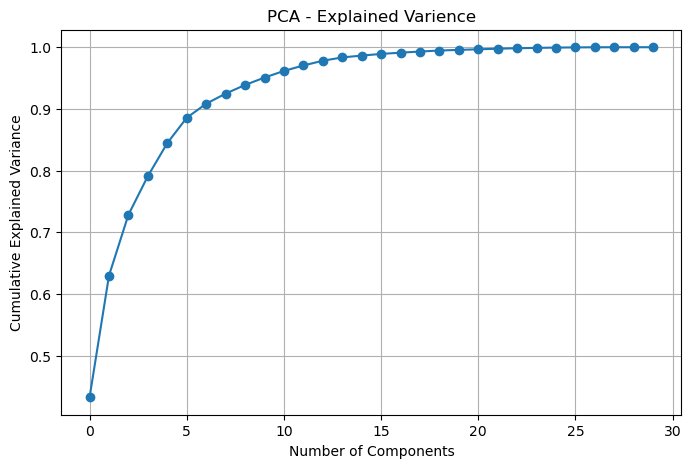

In [281]:
# Plot explained variance

plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Varience')
plt.grid(True)
plt.show()

In [282]:
# Keep components that explain ~95% of variance



pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### 7. Train ML Model (Random Forest)

In [283]:


clf = RandomForestClassifier(random_state  = 42)
clf.fit(X_train_pca , y_train)

RandomForestClassifier(random_state=42)

### 8. Evaluate Model

In [284]:

y_pred = clf.predict(X_test_pca)
print("Accuracy: ", accuracy_score(y_test , y_pred))
print("Classification Report: \n ", classification_report(y_test , y_pred))


Accuracy:  0.956140350877193
Classification Report: 
                precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### 9. Compare Without PCA

In [285]:

clf_no_pca = RandomForestClassifier(random_state=42)
clf_no_pca.fit(X_train, y_train)
y_pred_no_pca = clf_no_pca.predict(X_test)

print("\n--- Without PCA ---")
print("Accuracy:", accuracy_score(y_test, y_pred_no_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_no_pca))




--- Without PCA ---
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

